# Notebook para evaluación del SRI Vectorial

## Configuración inicial

In [1]:
# Cranfield load
from engine.cranfield import CranfieldGetter as Getter
from engine.cranfield import dataset

In [2]:
# Model load
from engine.vector import VectorIRS as IRS

In [3]:
# Get id of all documents
all_docs=[d.doc_id for d in dataset.docs_iter()]

In [4]:
# Setup system
IRS = IRS()
IRS.data_getter=Getter()

In [5]:
# Index the documents
IRS.add_documents(all_docs)

In [26]:
# Import Qrels and metrics
import engine.metrics as m
from engine.cranfield import CranfieldQrelsGetter as QrelGetter

# Maximum relevance definition
class MaxRelMetric(m.IRSMetric):
    def calculate(self, irs, qrel) -> float:
        return max((r for _,r in irs.pre_query(qrel.query)))

METRICS = {
    'Time': m.TimeMetric(), # In seconds
    'Prec':m.PrecisionMetric(),
    'Rec':m.RecoveryMetric(),
    'F1':m.F1Metric(),
    'Max': MaxRelMetric()
}

In [7]:
# Qrels load
QRELS=QrelGetter().getqrels()

In [8]:
from typing import Iterable

# Result of each metric in the model
RESULTS={}

## Cálculo

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
def print_results(metric):
    results = RESULTS[metric]

    ser = pd.Series(pd.cut(results, 15))
    grouped=ser.groupby(ser).count()

    df=pd.DataFrame(grouped.values,grouped.index)
    df.index.name='Intervalo'
    df.columns=['Frecuencia Absoluta']

    total=df['Frecuencia Absoluta'].sum()

    df['Frecuencia Relativa']=df['Frecuencia Absoluta']/total
    df['Porcentaje']=df['Frecuencia Relativa']*100
    df['Marca de Clase']=df.index.map(lambda x:x.mid)

    print(f'Promedio: {np.mean(results):.5f}')
    print(f'Máximo: {np.max(results):.5f}')
    print(f'Mínimo: {np.min(results):.5f}')
    print(f"Moda: {[float(x) for x in (df.loc[df['Frecuencia Absoluta'] == df.max()['Frecuencia Absoluta']]['Marca de Clase']).values]}")
    print(f"Mediana: {np.median(results):.5f}")
    print(f"Desviación estándar: {np.std(results):.5f}")
    
    print("\nCuartiles:")
    print(f"\tQ1:{np.quantile(results,.25)}")
    print(f"\tQ3:{np.quantile(results,.75)}")

    return df


def plot(metric):
    # Plotting
    plt.style.use('ggplot')
    plt.figure(figsize=(9, 5))
    plt.hist(RESULTS[metric], bins=15)

    return plt.show()


### Tiempo de procesado de la consulta en segundos

In [11]:
metric='Time'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)


In [12]:
print_results(metric)

Promedio: 0.25201
Máximo: 0.41700
Mínimo: 0.22070
Moda: [0.2405]
Mediana: 0.24680
Desviación estándar: 0.02375

Cuartiles:
	Q1:0.2369
	Q3:0.2614


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(0.221, 0.234]",31,0.137778,13.777778,0.2275
"(0.234, 0.247]",82,0.364444,36.444444,0.2405
"(0.247, 0.26]",48,0.213333,21.333333,0.2535
"(0.26, 0.273]",36,0.160000,16.000000,0.2665
"(0.273, 0.286]",18,0.080000,8.000000,0.2795
"(0.286, 0.299]",5,0.022222,2.222222,0.2925
"(0.299, 0.312]",1,0.004444,0.444444,0.3055
"(0.312, 0.325]",1,0.004444,0.444444,0.3185
"(0.325, 0.338]",1,0.004444,0.444444,0.3315


#### Histograma de frecuencia

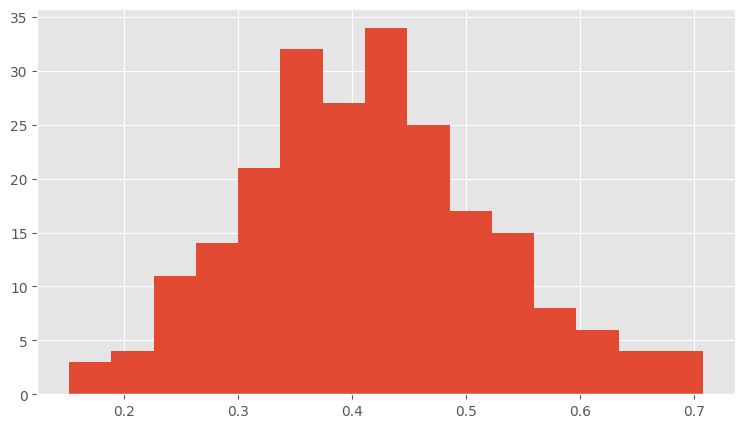

In [55]:
plot(metric)

### Precisión

In [19]:
metric='Prec'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)



In [20]:
print_results(metric)

Promedio: 0.01126
Máximo: 0.17568
Mínimo: 0.00000
Moda: [0.005762]
Mediana: 0.00753
Desviación estándar: 0.01517

Cuartiles:
	Q1:0.003835091083413231
	Q3:0.014827018121911038


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.000176, 0.0117]",148,0.657778,65.777778,0.005762
"(0.0117, 0.0234]",55,0.244444,24.444444,0.017550
"(0.0234, 0.0351]",15,0.066667,6.666667,0.029250
"(0.0351, 0.0468]",5,0.022222,2.222222,0.040950
"(0.0468, 0.0586]",0,0.000000,0.000000,0.052700
"(0.0586, 0.0703]",0,0.000000,0.000000,0.064450
"(0.0703, 0.082]",0,0.000000,0.000000,0.076150
"(0.082, 0.0937]",0,0.000000,0.000000,0.087850
"(0.0937, 0.105]",1,0.004444,0.444444,0.099350


#### Histograma de frecuencia

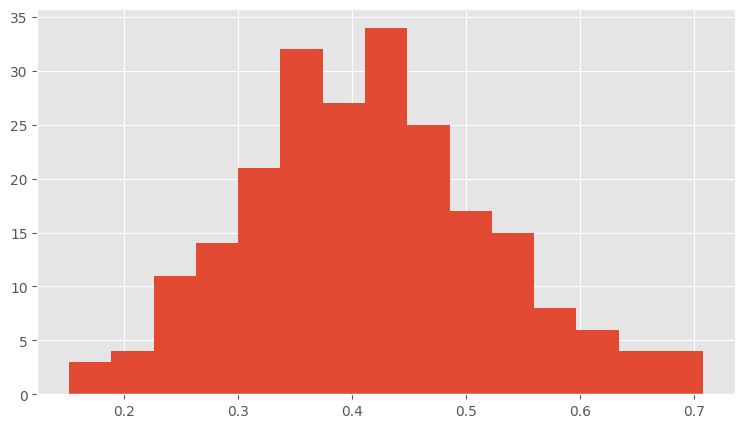

In [ ]:
plot(metric)

### Recobrado

In [21]:
metric='Rec'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)


In [22]:
print_results(metric)

Promedio: 0.92772
Máximo: 1.00000
Mínimo: 0.00000
Moda: [0.9665]
Mediana: 1.00000
Desviación estándar: 0.16436

Cuartiles:
	Q1:0.9285714285714286
	Q3:1.0


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.001, 0.0667]",3,0.013333,1.333333,0.03285
"(0.0667, 0.133]",0,0.000000,0.000000,0.09985
"(0.133, 0.2]",0,0.000000,0.000000,0.16650
"(0.2, 0.267]",0,0.000000,0.000000,0.23350
"(0.267, 0.333]",1,0.004444,0.444444,0.30000
"(0.333, 0.4]",0,0.000000,0.000000,0.36650
"(0.4, 0.467]",1,0.004444,0.444444,0.43350
"(0.467, 0.533]",5,0.022222,2.222222,0.50000
"(0.533, 0.6]",2,0.008889,0.888889,0.56650


#### Histograma de frecuencia

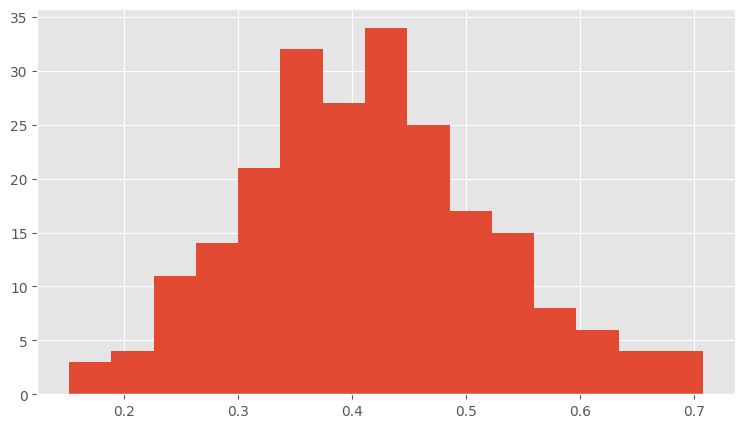

In [ ]:
plot(metric)

### Formula F1

In [23]:
metric='F1'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)



In [24]:
print_results(metric)

Promedio: 0.02160
Máximo: 0.25000
Mínimo: 0.00000
Moda: [0.008225]
Mediana: 0.01493
Desviación estándar: 0.02494

Cuartiles:
	Q1:0.007640878701050621
	Q3:0.02922077922077922


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.00025, 0.0167]",123,0.546667,54.666667,0.008225
"(0.0167, 0.0333]",62,0.275556,27.555556,0.025000
"(0.0333, 0.05]",22,0.097778,9.777778,0.041650
"(0.05, 0.0667]",11,0.048889,4.888889,0.058350
"(0.0667, 0.0833]",4,0.017778,1.777778,0.075000
"(0.0833, 0.1]",1,0.004444,0.444444,0.091650
"(0.1, 0.117]",0,0.000000,0.000000,0.108500
"(0.117, 0.133]",0,0.000000,0.000000,0.125000
"(0.133, 0.15]",0,0.000000,0.000000,0.141500


#### Histograma de frecuencia

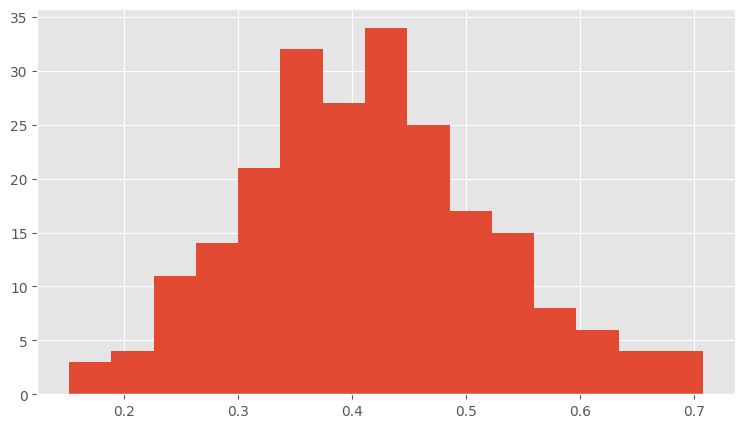

In [ ]:
plot(metric)

### Relevancia máxima


In [27]:
metric='Max'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)



In [28]:
print_results(metric)

Promedio: 0.41541
Máximo: 0.70808
Mínimo: 0.15214
Moda: [0.4305]
Mediana: 0.41306
Desviación estándar: 0.10852

Cuartiles:
	Q1:0.344261634221322
	Q3:0.4810676931512318


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(0.152, 0.189]",3,0.013333,1.333333,0.1705
"(0.189, 0.226]",4,0.017778,1.777778,0.2075
"(0.226, 0.263]",11,0.048889,4.888889,0.2445
"(0.263, 0.3]",14,0.062222,6.222222,0.2815
"(0.3, 0.337]",21,0.093333,9.333333,0.3185
"(0.337, 0.375]",32,0.142222,14.222222,0.3560
"(0.375, 0.412]",27,0.120000,12.000000,0.3935
"(0.412, 0.449]",34,0.151111,15.111111,0.4305
"(0.449, 0.486]",25,0.111111,11.111111,0.4675


#### Histograma de frecuencia

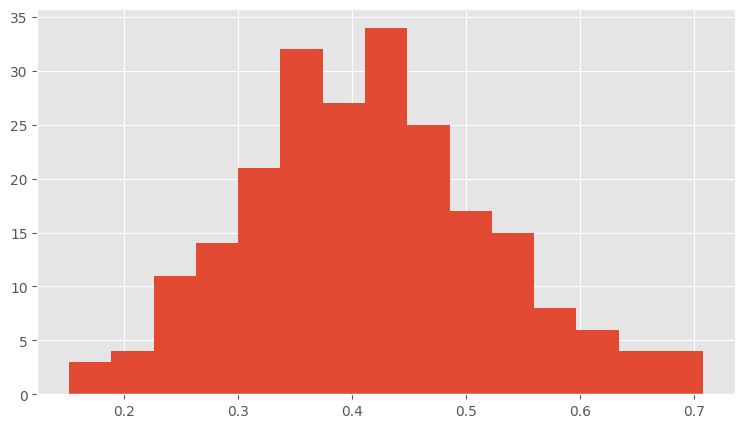

In [ ]:
plot(metric)